In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cvxpy as cvx

def diff(n, k=1):
    """ Construct kth order difference matrix with shape (n-k, n) 
    """
    D = np.diag(-1*np.ones(n)) + np.diag(np.ones(n-1),1)
    D = D[:-1,:]
    if k > 1:
        return diff(n-1,k-1).dot(D)
    else:
        return D

# time series smoothing

- noisy observations at regular interval, $y \in \mathbf{R}^n$ (discritized curve)
- don't have a model for the curve (linear, polynomial, ...)
- do know the the curve should be "smooth"
- idea: find $x \in \mathbf{R}^n$ which is close to $y$, but also penalized for being nonsmooth

# "smoothness"
- roughly define smoothness to be a curve which does not change slope much
- change in slope (of a smooth curve) given by the second derivative
- change in slope of a discretized curve given by the second-order differences, $Dx$, where
$$
D = \begin{pmatrix}
1 & -2 & 1 & 0 & \ldots & &&0 \\
0 & 1  & -2 & 1 & 0 & \ldots & &0\\
0 & 0 &1 & -2 & -1 & 0 & \ldots & 0 \\
\vdots &
\end{pmatrix}
$$

# model
- $x$ close to the data if $\|x-y\|_2^2$ is small
- $x$ is smooth if $\|Dx\|_2^2$ is small
- solve the least-squares problem
$$
\begin{array}{ll}
\mbox{minimize} & \|x-y\|_2^2 + \rho \|Dx\|_2^2
\end{array}
$$
- $\rho$ trades-off between fidelity to the data and smoothness


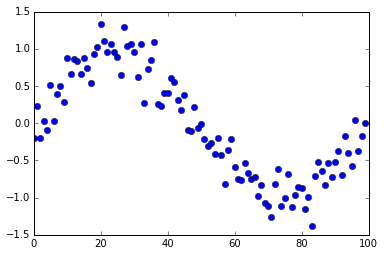

In [2]:
# generate data
n = 100
t = np.linspace(0, 2*np.pi, n)
y = np.sin(t)
y = y + np.random.randn(n)*.2
plt.plot(y,'o')

# $\rho = 1$

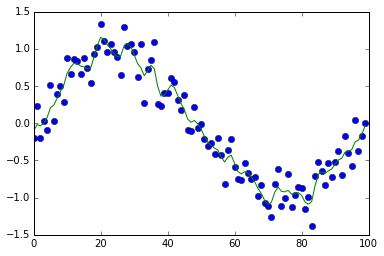

In [3]:
# get second-order difference matrix
D = diff(n, 2)
rho = 1

x = cvx.Variable(n)
cvx.Problem(cvx.Minimize(cvx.sum_squares(x-y) + rho*cvx.sum_squares(D*x))).solve()
x = np.array(x.value).flatten()

plt.plot(y,'o')
plt.plot(x,'g-')

# $\rho = 10$

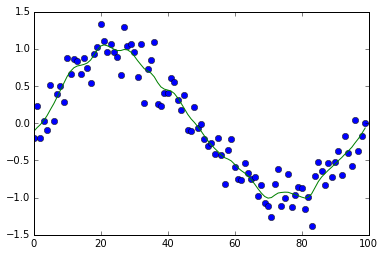

In [4]:
rho = 10

x = cvx.Variable(n)
cvx.Problem(cvx.Minimize(cvx.sum_squares(x-y) + rho*cvx.sum_squares(D*x))).solve()
x = np.array(x.value).flatten()

plt.plot(y,'o')
plt.plot(x,'g-')

# $\rho = 1000$

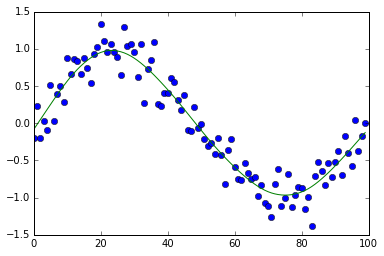

In [5]:
rho = 1000

x = cvx.Variable(n)
cvx.Problem(cvx.Minimize(cvx.sum_squares(x-y) + rho*cvx.sum_squares(D*x))).solve()
x = np.array(x.value).flatten()

plt.plot(y,'o')
plt.plot(x,'g-')